In [2]:
# 必要なライブラリのインポート
# データの処理および可視化
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc

# 前処理用クラスの呼び出し
import Preprocessing

# 予測モデルの作成
from sklearn.linear_model import LogisticRegression

### データのインポート

In [3]:
# データのインポート
df = pd.read_csv('./data/train.csv')

### データの前処理

In [4]:
# クラスの呼び出し
prepro = Preprocessing.Prepro(df)
# One-Hotエンコーディング
df = prepro.one_hot(df)
#　必要な特徴量に削減
df = prepro.drop_feature(df)
# 特徴量と正解データに分解(標準化も適応)
X, y = prepro.label_split(df)
# train, test, validationデータに分割
X_train, X_valid, X_test, y_train, y_valid, y_test = prepro.split(X, y)

### モデルの構築

In [5]:
#モデルの構築と学習
lr = LogisticRegression(C = 0.01, solver = 'lbfgs', multi_class = 'ovr') 
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, multi_class='ovr')

In [6]:
# モデルの保存
with open('model.pickle', mode = 'wb') as f:
    pickle.dump(lr, f)

### 予測結果の確認

In [7]:
# trainデータの評価
y_pred_train = lr.predict(X_train)
prepro.output(y_train, y_pred_train)

accuracy :  0.8523676880222841
precision :  0.8523809523809524
recall :  0.8905472636815921
f1 score :  0.8710462287104624


In [8]:
#　validationデータの評価
y_pred_valid = lr.predict(X_valid)
prepro.output(y_valid, y_pred_valid)

accuracy :  0.8636363636363636
precision :  0.8350515463917526
recall :  0.9418604651162791
f1 score :  0.8852459016393444


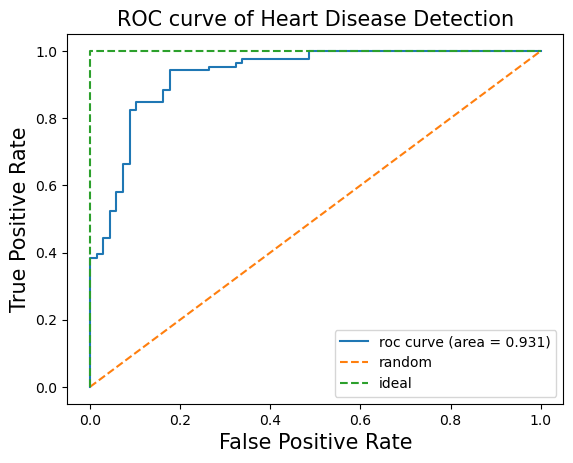

In [9]:
#ROC曲線の描画、AUCの計算（ROC曲線の下側の面積）の計算
y_score = lr.predict_proba(X_valid)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_valid, y_score=y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.title('ROC curve of Heart Disease Detection',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.show()

In [10]:
# testデータによる予測
y_pred_test = lr.predict(X_test)
prepro.output(y_test, y_pred_test)

accuracy :  0.8294573643410853
precision :  0.8205128205128205
recall :  0.8888888888888888
f1 score :  0.8533333333333333


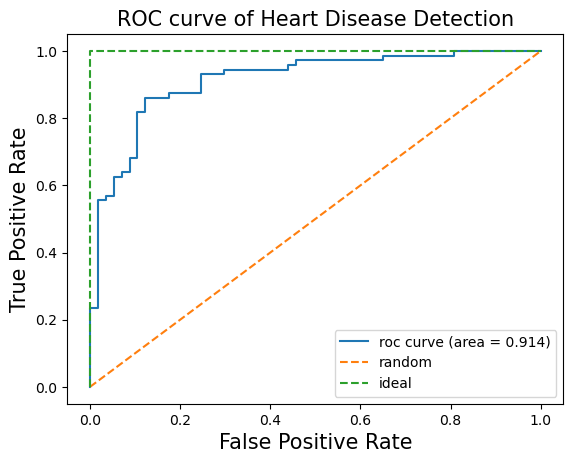

In [11]:
#ROC曲線の描画、AUCの計算（ROC曲線の下側の面積）の計算
y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.title('ROC curve of Heart Disease Detection',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.show()

### SHAP

In [12]:
import shap

In [13]:
feature_names = ['RestingBP',
       'FastingBS',
       'Age',
       'Sex',
       'Oldpeak',
       'ST_Slope_Flat',
       'ST_Slope_Up',
       'ChestPainType_ATA',
       'ChestPainType_NAP',
       ]

explainer = shap.Explainer(lr, X_train, feature_names=feature_names)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)